In [2]:
import pandas as pd

df = pd.DataFrame()

for page_num in range(1, 11):
    base_url = f"https://land.naver.com/news/trendReport.naver?page={page_num}"
    temp = pd.read_html(base_url)
    df = pd.concat([df, temp[0]])    

In [3]:
temp = df['제목'].str.replace('%', '')


regions = ['전국', '서울', '수도권']

for region in regions:
    temp = temp.str.replace(region, '')
    
temp = temp.str.split(']', expand=True)[1]
temp = temp.str.split(',', expand=True)
temp = temp.astype(float)

In [4]:
df[regions] = temp

In [5]:
df

,번호,제목,등록일,조회수,전국,서울,수도권
0,1806,"[6월3주 전국]전국-0.01%, 서울 0.05%, 수도권 0.01%",2024.06.24,482,-0.01,0.05,0.01
1,1805,"[6월2주 전국]전국 0.09%, 서울 0.20%, 수도권 0.13%",2024.06.17,971,0.09,0.20,0.13
2,1804,"[6월1주 전국]전국-0.04%, 서울 0.02%, 수도권-0.02%",2024.06.07,1199,-0.04,0.02,-0.02
3,1803,"[5월5주 전국]전국 0.04%, 서울 0.12%, 수도권 0.08%",2024.05.31,993,0.04,0.12,0.08
4,1802,"[5월4주 전국]전국 0.04%, 서울 0.00%, 수도권-0.06%",2024.05.27,846,0.04,0.00,-0.06
...,...,...,...,...,...,...,...
15,1607,"[9월4주 전국] 전국 0.28%, 서울 0.47%, 수도권 0.39%",2020.09.25,4720,0.28,0.47,0.39
16,1606,"[9월3주 전국] 전국 0.30%, 서울 0.56%, 수도권 0.43%",2020.09.18,3848,0.30,0.56,0.43
17,1605,"[9월2주 전국] 전국 0.43%, 서울 0.50%, 수도권 0.50%",2020.09.11,3737,0.43,0.50,0.50
18,1604,"[9월1주 전국] 전국 0.40%, 서울 0.57%, 수도권 0.51%",2020.09.04,4138,0.40,0.57,0.51


In [6]:
df_rate = df[['등록일'] + regions + ['번호']]

In [7]:
df_rate = df_rate[::-1]

In [13]:
df_rate['월'] = df_rate['등록일'].str.replace('.', '').astype('datetime64[ns]').dt.month
df_rate['년도'] = df_rate['등록일'].str.replace('.', '').astype('datetime64[ns]').dt.year
# df_rate.head(30).plot(x='등록일', y=['전국', '서울', '수도권'], figsize=(15, 6))

<Axes: xlabel='년도'>

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\USER

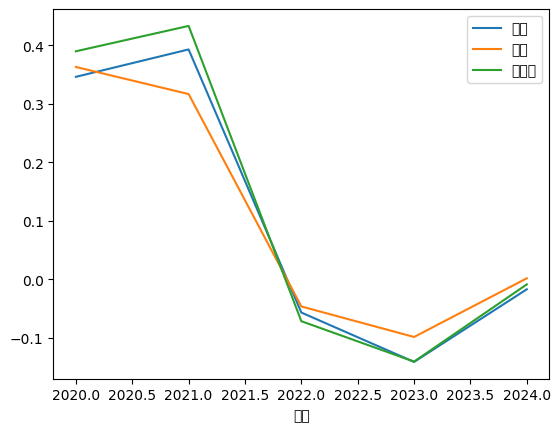

In [24]:
df_rate